In [18]:
import seaborn as sns #this is the plotting library I'll be using 
import pandas as pd #"as pd" means that we can use the abbreviation in commands
import matplotlib.pyplot as plt #we need Matplotlib for setting the labels in the Seaborn graphs
import sklearn as sk

df = pd.read_csv("funda-amsterdam.csv")
df = df.dropna(how='all')
df.head()

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906


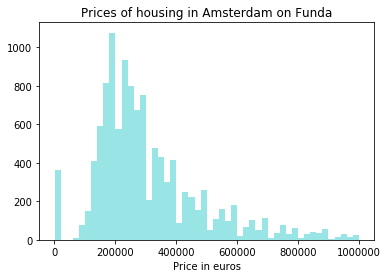

In [13]:
sns.distplot(df['price'].dropna(), kde=False, color="c") 
plt.title('Prices of housing in Amsterdam on Funda')
plt.xlabel('Price in euros')
plt.show()

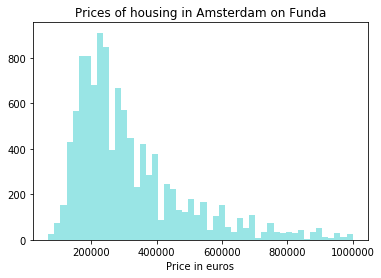

In [14]:
def under_20000(x):
    if(x < 20000): 
        return float('NaN')
    else: 
        return x
df['price'] = df['price'].apply(under_20000)

sns.distplot(df['price'].dropna(), kde=False, color="c") 
plt.title('Prices of housing in Amsterdam on Funda')
plt.xlabel('Price in euros')
plt.show()

To see if there is a linear regression between price and surface area, I'm taking surface area as the independent variable (X) and price as the dependent variabe (Y). Because surface is more likely to be the cause of a higher price = price is dependent from the surface area. We're going to plot both variables. 

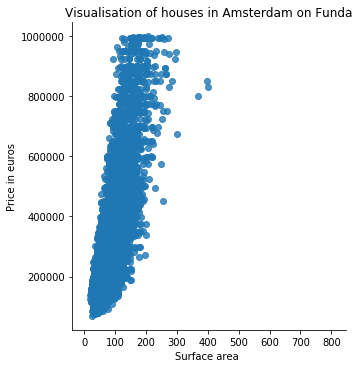

In [15]:
sns.lmplot(x='area', y='price', fit_reg=False, data=df, ) #fit_reg=False leaves out the regression line; see below
plt.xlabel('Surface area ')
plt.ylabel('Price in euros')
plt.title('Visualisation of houses in Amsterdam on Funda')
plt.show()

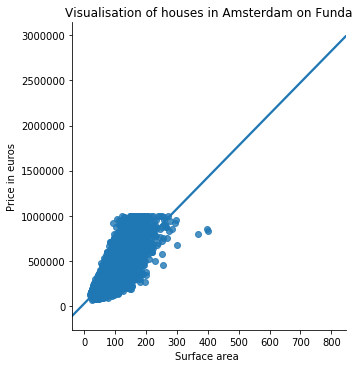

In [16]:
sns.lmplot(x='area', y='price', data=df, ci=False) 
plt.xlabel('Surface area ')
plt.ylabel('Price in euros')
plt.title('Visualisation of houses in Amsterdam on Funda')
plt.show()

There are a few things to note here:

- First, the data seem to fit a linear pattern: you can draw a straight line to fit the points
- However, there is quite a bit of variation around this line. Some points will be above it, some below. 
- The prices are quit variationate.

In [20]:
from sklearn.linear_model import LinearRegression 

x = df[['area']] 
y = df['price']
lm = LinearRegression() 
lm.fit(x, y) 

b0 = lm.intercept_ 
b1 = lm.coef_[0]

print(f"The regression line is equal to y = {b0:.2f} + {b1:.2f}X") 

The regression line is equal to y = 207124.91 + 1139.56X


$ y = 207124.91 + 1139.56X $

Where *y* is surface area and *x* is price in euros.

Now we have a linear model for the relation, using sk-learn. We can predict what the price will be for a house of 70 m2.  

In [37]:
lm.predict([[70]])
print(f"The predicted price is equal to {lm.predict([[70]])} euros")

The predicted price is equal to [286894.17672918] euros


In [35]:
df['price_p'] = lm.predict(x) 
df.head(10)

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built,price_p
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,330197.492903,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,330197.492903
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,260684.274834,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938,260684.274834
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,339313.980519,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003,339313.980519
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,273219.445306,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910,273219.445306
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,278917.250066,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,278917.250066
5,5,Bertrand Russellstraat 46,125,2,1097 HL,20-5-2016,349570.029086,apartment,3,9-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1991,349570.029086
6,6,Admiraal De Ruijterweg 417 I,64,3,1055 ME,14-6-2016,280056.811018,apartment,4,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,280056.811018
7,7,Deltastraat 10 -boven,155,3,1078 PC,24-5-2016,383756.857644,apartment,5,9-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906,383756.857644
8,8,Ben van Meerendonkstraat 49,85,2,1087 LB,21-5-2016,303987.591008,apartment,3,10-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2007,303987.591008
9,9,Jacob van Lennepstraat 263 B,67,2,1053 JE,13-5-2016,283475.493873,apartment,3,27-5-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1900,283475.493873


In [38]:
house = df[df['address'] == 'Slichtenhorststraat 10']
house.head()

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built,price_p
21,21,Slichtenhorststraat 10,114,3,1107 VH,18-9-2015,337034.858615,house,4,3-5-2016,http://www.funda.nl/koop/verkocht/amsterdam/hu...,1983,337034.858615


In [39]:
residual = house['price'] - house['price_p']